# Содержание
_______________

<p>1. <a href="#LinearRegression"><font size='4'>LinearRegression</font></a></p>
<ul>

<p>1.1. <a href="#MNK"><font size='3'>МНК</font></a></p>

<p>1.2. <a href="#hats"><font size='3'>Оценки качества моделей</font></a></p>
</ul>
<p>2. <a href="#Intervals"><font size='4'>Построение интервального прогноза</font></a></p>
<ul>

<p>2.1. <a href="#trend"><font size='3'>Построение тренда</font></a></p>
</ul>

</ul>

In [1]:
import numpy as np
import pandas as pd
import scipy

%matplotlib inline
from matplotlib import pyplot as plt
import glob

<p><a name="LinearRegression"></a></p>

# 1. LinearRegression

Рассмотрим случаи, для которых мы хотим предпооложить, что одна $\textit{зависимая}$ переменная $Y$ определяется другими переменными, называемые $\textit{объясняющими}$ переменными (регрессорами). Математическая зависимость, связывающая эти переменные, называется $\textit{моделью регрессии}.$ Мы допускаем, что модель регрессии имеет факт неточности - $\textit{случайный}$ (остаточный) член.

Начнем с рассмотрения простешей модели:
$$ Y_i = \alpha + \beta X_i + \xi_i  $$

$Y_i$ - значение зависимой переменной, $\alpha$ и $\beta$ - постоянные величины - параметры уравнения, $\xi_i$ - случайный член.

Задача регрессионого анализа состоит в получении оценок $\alpha$ и $\beta$ и, следовательно, в определении положения прямой по точкам $\Leftrightarrow$ нужно посроить прямую, в наибольшей степени соответствующую этим точкам.

$a$ - отсечение $Y$ - оценка $\alpha$

$b$ - угловой коэффициент  - оценка $\beta$

Загрузим данные из исходного файла

In [2]:
directory = 'data/*.csv' 
files = glob.glob(directory)[0]
files

'data\\data_1.csv'

In [3]:
data = pd.read_csv(files,index_col=0, parse_dates=True)
data.head()

,Total
Month,
2007-01-01,38.24
2007-01-02,36.61
2007-01-03,40.26
2007-01-04,48.17
2007-01-05,42.45


<p><a name="MNK"></a></p>

## 1.1 МНК

Пусть $$\widehat{Y} = a+bX_i $$ 
оцениваемая модель, а $Y_i$ - оцененное значение $Y$. Наша задача заключается в том, чтобы выяснить, существут ли способы оценки коэффициентов $a,b$ алгебраическим путем.

Обозначим за $$e_i = Y_i - \widehat{Y_i} =Y_i - a - bX_i $$

Остаток наблюдений зависит от выбора коэффициентов $a$ и $b$ $\Rightarrow$ задача заключается в том, чтобы выбрать такие $a$ и $b$, предсказанное значение функции от искомой в каждой точке было минимальным. Глупо минимизировать сумма остатков, потому что при выборе выборочного среднего модели: $$\sum e_i = 0 $$ 

Пусть у нас имеются $n$ наблюдений $(X_i,Y_i)$, $Y$ зависит от $X$ и мы хотим подобрать уравнение: $$\widehat{Y} = a+bX_i$$

Запишем формально нашу задачу в обозначениях метода наименьших квадратов (МНК):

$$ S = \sum (Y_i-\widehat{Y_i})^2 = \sum (Y_i - a - bX_i)^2 \to min $$

Нашей задачей будет аппроксимация функции для данных точек:

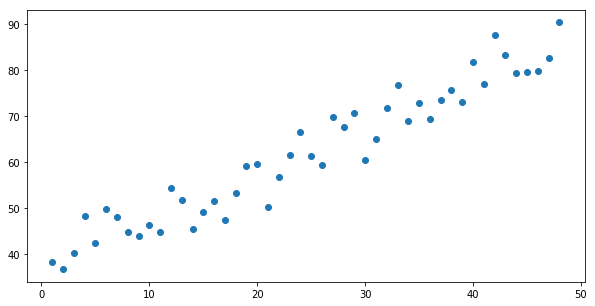

In [4]:
plt.figure(figsize=[10,5])
plt.scatter(range(1,data.shape[0]+1), data.Total)

plt.show()

Для подбора коэффициентов подойдет модель линейной регрессии, реализованная в пакете `sklearn`

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Отобразим каждому индексу его порядковый номер, начиная с единицы. Эти значения будут являться координатами точек по $X$.

In [6]:
X = np.array(range(1,data.shape[0]+1)).reshape(data.shape[0],1)
X[0:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

Значениями по оси $Y$ будут являться значения столбца `data.Total`

In [7]:
y = data.Total.values
y

array([38.24, 36.61, 40.26, 48.17, 42.45, 49.7 , 47.95, 44.77, 43.88,
       46.25, 44.72, 54.28, 51.7 , 45.39, 49.17, 51.53, 47.28, 53.26,
       59.06, 59.61, 50.17, 56.75, 61.55, 66.61, 61.25, 59.38, 69.86,
       67.56, 70.57, 60.36, 65.  , 71.77, 76.72, 69.  , 72.81, 69.4 ,
       73.48, 75.56, 72.97, 81.81, 76.99, 87.53, 83.37, 79.41, 79.56,
       79.83, 82.57, 90.38])

Обучим нашу модель, модель подберет коэффициенты

In [8]:
assert len(X)==len(y)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Угловой коэффициент линейной регрессии $b$ равен:

In [9]:
coefs = model.coef_
coefs

array([1.0042716])

А отсечение по $Y$ - $a$:

In [10]:
const = model.intercept_
const

37.19742907801419

Следовательно, уравнение полученной нами модели по методу наименьших квадратов равно:
$$\widehat{Y_i} = 37.19+1.004X_i $$ 

In [11]:
y_pred = model.predict(X) #предсказание модели
y_pred[0:5]

array([38.20170068, 39.20597228, 40.21024388, 41.21451549, 42.21878709])

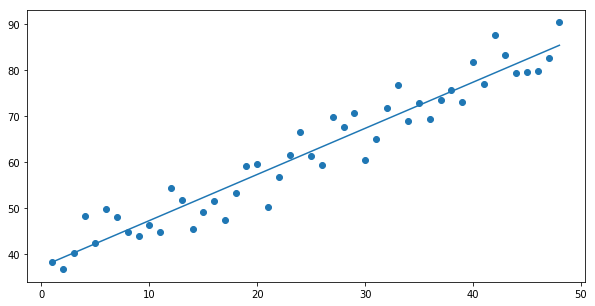

In [12]:
plt.figure(figsize=[10,5])
plt.scatter(range(1,data.shape[0]+1), data.Total)
plt.plot(X,y_pred)

plt.show()

<p><a name="hats"></a></p>

## 1.2 Оценки качестве моделей

Цель регрессии - объяснение поведения $Y$. В любой выборке $Y$ оказываетяс низким, а в других - высоким. Разброс значений $Y$ можно описать с помощью суммы квадратов отклонений от выборочного среднего.
$$ \sum (Y - \overline{Y})^2 $$

Все показатели корреляции основаны на правиле сложения дисперсий $\Rightarrow$ можно разложить $\textbf{общую сумму квадратов отклонений } $ переменной $Y$ от среднего значения $\overline{Y}$ на две части - $\textbf{"объясненную"}$ сумму квадратов и $\textbf{"необъясненную"}$. 
$$\sum (Y - \overline{Y})^2 = \sum (\widehat{Y}-\overline{Y})^2 + \sum (Y - \widehat{Y})^2 $$

Данное равенство можно переписать как:
$$SS_T = SS_R + SS_E $$

где: 

$SS_T  = \sum (Y - \overline{Y})^2 $  - общая сумма квадратов отклонений $\textit{(total sum of squares)}$

$SS_R = \sum (\widehat{Y}-\overline{Y})^2 $ - $\textbf{сумма квадратов отклонений, объясненная}$ регрессией, $\textbf{факторная сумма}$ $\textit{(sum of square due to regression)}$

$SS_E = \sum (Y - \widehat{Y})^2  = \sum e_i^2 $ - $\textbf{остаточная сумма}$ квадратов отклонений,
$\textit{(sum of square due to error)}$.

Введем $\textbf{коэффициент детерминации}$:
$$ R^2 = r^2 = \frac{\sigma_{y,obyasn}^2}{\sigma_{y,obch}^2} = \frac{SS_R}{SS_T} = 1 - \frac{SS_E}{SS_T} = 1 - \frac{\sum (Y - \widehat{Y})^2}{\sum (Y - \overline{Y})^2} $$
$$ R^2 = \frac{\sum (\widehat{Y}-\overline{Y})^2}{\sum (Y - \overline{Y})^2} = 1 - \frac{\sum (Y - \hat{Y})^2}{\sum (Y - \overline{Y})^2}  $$

$\textbf{Коэффициент детерминации}$- обобщающий показатель оценки качества построенного уравнения регрессии.

In [13]:
sst = (np.array([y-y.mean()])**2).sum()
sst

10023.687991666666

In [14]:
sse = (np.array([y-y_pred])**2).sum()
sse

732.8199041178173

In [15]:
ssr = (np.array([y_pred-y.mean()])**2).sum()
ssr

9290.868087548846

In [16]:
R2 = 1 - sse/sst
R2

0.926891189677187

Для оценки модели вводятся дополнительные коэффициенты оценок качества:

$\textit{Средняя ошибка аппроксимации}$ (mean absolute percentage error) определяется по формуле:

$$ \text{MAPE} = \frac{\sum \left| \frac{Y_i - \widehat{Y_i}}{Y_i} \right | \cdot 100\%} {n}  $$

$\textit{Средняя относительная ошибка аппроксимации}$ определяется по формуле: (нужно смотреть)

$$A_{first}(?) =  \sqrt{\frac{\sum_{i=1}^{n} (Y_i - \widehat{Y_i})^2}{n}} \cdot \frac{100\%}{\bar{Y}}  $$

In [17]:
MAPE = abs([y-y_pred]/y_pred).sum()*100/len(y)
MAPE

5.424588549588049

In [18]:
import math
A_first = math.sqrt(sse/len(y))*100/y.mean()
A_first

6.322297010186135

Вычислим среднеквадратичную ошибку вычислений

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(y_pred,y)

15.267081335787859

<p><a name="Intervals"></a></p>

# 2. Построение интервального прогноза

При построении нашего прогноза, мы можем использовать ту же самую статистику, только для прогнозируемых нами значений. Итого:
$$\frac{\hat{Y_i}-Y_i}{\sigma} \sim T(n) $$ 
где $$\sigma^2 = \frac{\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}{n} $$
-выборочная смещенная дисперсия
$$ P(-T_{n,\alpha} < \frac{\hat{Y_i}-Y_i}{\sigma} < T_{n,\alpha} ) = \alpha $$
$$ \left (\hat{Y_i} -T_{n,\alpha}\cdot \sigma \leq Y_i \leq \hat{Y_i} +T_{n,\alpha}\cdot \sigma \right ) $$

In [21]:
x_test = np.array(range(48,61)).reshape(13,1)
x_test

array([[48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60]])

In [22]:
y_test = model.predict(x_test) #предсказание модели
y_test[0:5]

array([85.40246599, 86.40673759, 87.41100919, 88.41528079, 89.4195524 ])

In [23]:
from scipy.stats import t as student

In [24]:
sigma_error = sse / len(y)
sigma_error

15.267081335787859

In [25]:
y_up = y_test+student.ppf(0.95, len(x_test))*math.sqrt(sigma_error)

In [26]:
y_down =y_test-student.ppf(0.95, len(x_test))*math.sqrt(sigma_error)

In [27]:
y_diff_two_values_down = y_test -((1/len(x_test) + (x_test - x_test.mean())**2 /(x_test**2))*\
                                  sigma_error*student.ppf((1+0.95)/2, len(x_test)-2)).flatten()

In [28]:
y_diff_two_values_up = y_test +((1/len(x_test) + (x_test - x_test.mean())**2 /(x_test**2))*\
                                sigma_error*student.ppf((1+0.95)/2, len(x_test)-2)).flatten()

In [29]:
y_lies_in_predicting_up = y_test +((1+1/len(x_test) + (x_test - x_test.mean())**2 /(x_test**2))*\
                                   sigma_error*student.ppf((1+0.95)/2, len(x_test)-2)).flatten()

In [30]:
y_lies_in_predicting_down = y_test - ((1+ 1/len(x_test) + (x_test - x_test.mean())**2 /(x_test**2))*\
                                      sigma_error*student.ppf((1+0.95)/2, len(x_test)-2)).flatten()

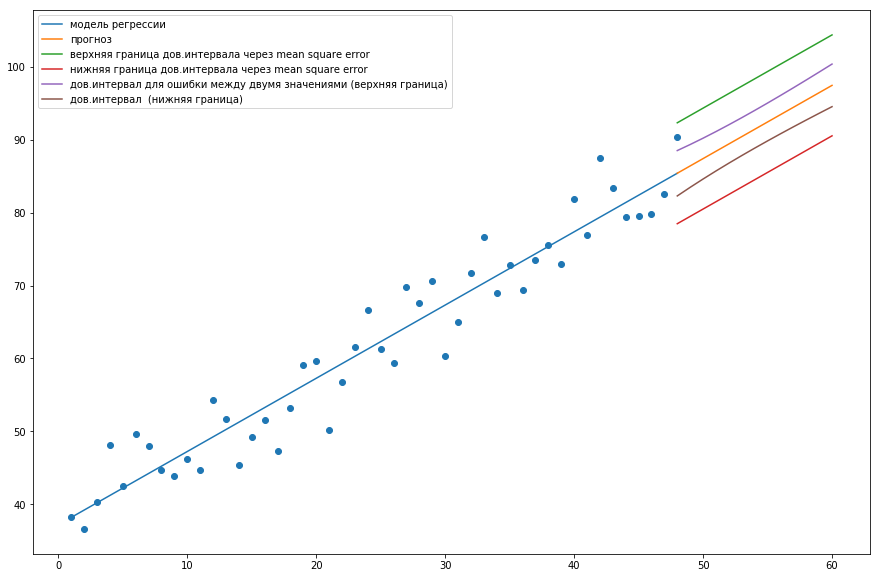

In [31]:
plt.figure(figsize=[15,10])
plt.scatter(range(1,data.shape[0]+1), data.Total)
plt.plot(X,y_pred)
plt.plot(x_test,y_test)
plt.plot(x_test,y_up)
plt.plot(x_test,y_down)
plt.plot(x_test,y_diff_two_values_up)
plt.plot(x_test,y_diff_two_values_down)
plt.legend(['модель регрессии','прогноз','верхняя граница дов.интервала через mean square error',\
            'нижняя граница дов.интервала через mean square error',\
            'дов.интервал для ошибки между двумя значениями (верхняя граница)',
          'дов.интервал  (нижняя граница)' ])

plt.show()

<p><a name="trend"></a></p>

## 2.1 Построение тренда

In [32]:
directory = 'data/*.csv' 
files = glob.glob(directory)[1]
files

'data\\data_2.csv'

In [33]:
data = pd.read_csv(files,index_col=0, parse_dates=True)
data

,Total
Month,
2009-01-05,4.07
2009-01-06,4.46
2009-01-07,4.72
2009-01-08,5.15
2009-01-09,5.25
2009-01-10,5.44
2009-01-11,5.25
2009-01-12,5.07
2010-01-01,4.82


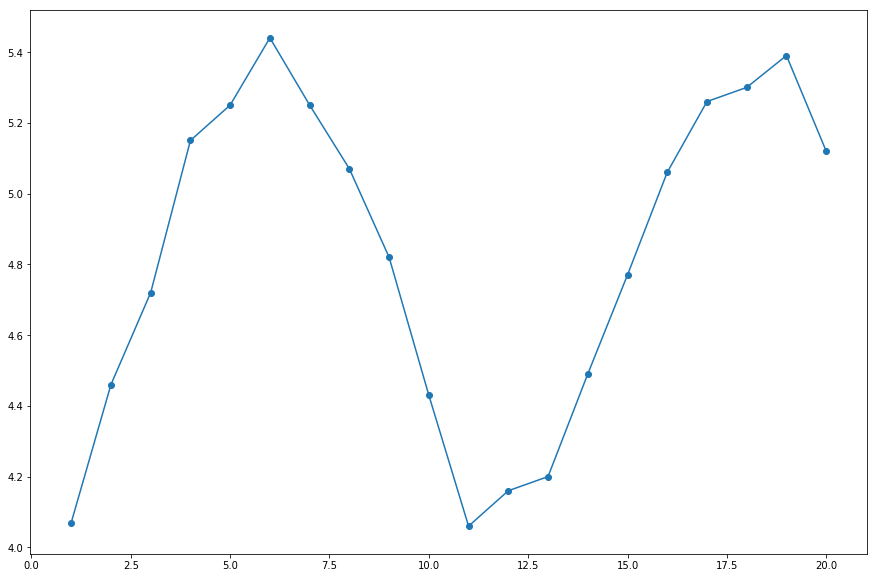

In [34]:
X = np.array(range(1,data.shape[0]+1)).reshape(data.shape[0],1)
y = data.Total.values


plt.figure(figsize=[15,10])
plt.plot(X,y)
plt.scatter(range(1,data.shape[0]+1), data.Total)

plt.show()

Month
2009-01-05      NaN
2009-01-06    4.265
2009-01-07    4.590
2009-01-08    4.935
2009-01-09    5.200
2009-01-10    5.345
2009-01-11    5.345
2009-01-12    5.160
2010-01-01    4.945
2010-01-02    4.625
Name: Total, dtype: float64


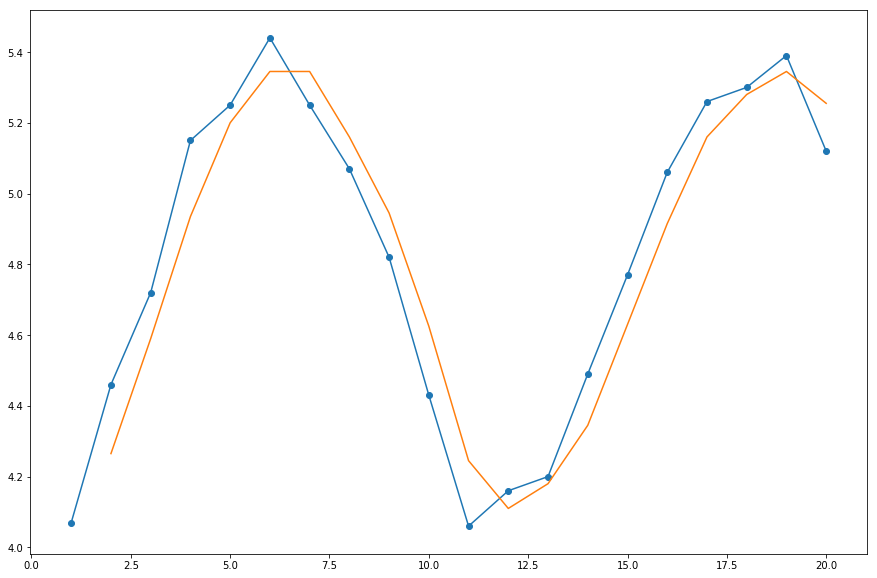

In [35]:
rolling = data.Total.rolling(window=2)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
plt.figure(figsize=[15,10])
plt.plot(X,y)
plt.scatter(range(1,data.shape[0]+1), data.Total)
plt.plot(X,rolling_mean)


plt.show()

In [79]:
y1  = data.Total.values
y2 = np.hstack((data.Total.values[-8:],data.Total.values[-12:]))

In [80]:
x1= np.arange(len(y1))
x2= np.arange(len(y1)) + len(y2)

In [81]:
len(y2),len(x2)

(20, 20)

In [82]:
len(x1)

20

In [83]:
len(y1)

20

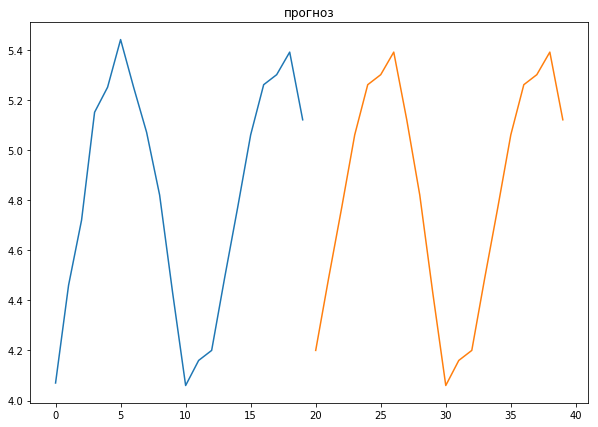

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax  = plt.subplots(figsize = [10,7])
ax.plot(x1,y1)
ax.plot(x2,y2)
plt.title('прогноз')
plt.show()